In [18]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io, color

Select a set of grayscale images (e.g., faces, landscapes, or any other category). Normalize the images by scaling pixel values to a range [0, 1].

66 100


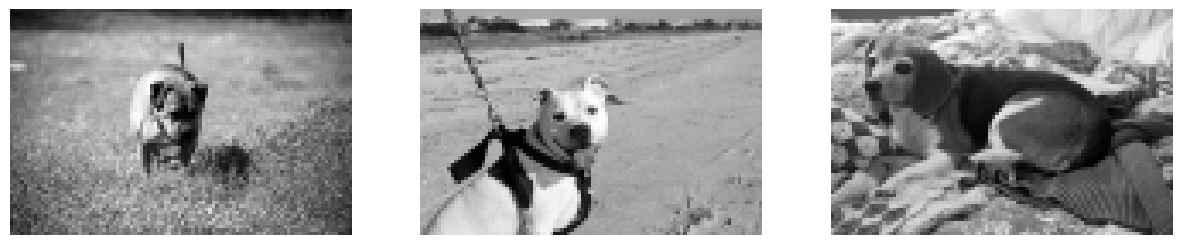

In [2]:
image_paths = [
    # '../data/intel_images/194.jpg',
    # '../data/intel_images/232.jpg',
    # '../data/intel_images/301.jpg'
    '../data/oxford-iiit-pet/images/american_bulldog_100.jpg',
    '../data/oxford-iiit-pet/images/staffordshire_bull_terrier_75.jpg',
    '../data/oxford-iiit-pet/images/beagle_104.jpg'
]

downsample_factor = 5  # Adjust this factor as needed

grayscale_images = []
normalized_images = []

for image_path in image_paths:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Downsample the image
    downsampled_image = cv2.resize(image, 
                                    (image.shape[1] // downsample_factor, 
                                     image.shape[0] // downsample_factor), 
                                    interpolation=cv2.INTER_AREA)
    
    normalized_image = downsampled_image / 255.0  # Normalize to [0, 1]

    grayscale_images.append(downsampled_image)
    normalized_images.append(normalized_image)

if normalized_images:  # Check if there are any normalized images
    height, width = normalized_images[0].shape[:2]
    print(height, width)

    # Create a single figure to display images side by side
    plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
    for i, img in enumerate(normalized_images):
        plt.subplot(1, len(normalized_images), i + 1)  # 1 row, N columns
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.show()


# PCA Implementation
Write a Python function to perform PCA on the images. Implement the following steps:

### Convert the image into a 2D matrix where each row represents an image and each column represents a pixel value.

In [3]:
flattened_images = [image.flatten() for image in normalized_images]

# Stack the flattened images to form a 2D matrix
image_matrix = np.stack(flattened_images)

# Print the resulting 2D matrix shape (for verification)
print(f"2D Matrix shape: {image_matrix.shape}")

# Optional: Print the matrix to see the pixel values
print(image_matrix)

2D Matrix shape: (3, 6600)
[[0.12156863 0.14117647 0.14117647 ... 0.24705882 0.25882353 0.17647059]
 [0.62352941 0.60784314 0.61960784 ... 0.54509804 0.53333333 0.56862745]
 [0.3372549  0.3372549  0.34117647 ... 0.21960784 0.24705882 0.23529412]]


### Compute the covariance matrix of the image data.

In [4]:
covariance_matrix = np.cov(image_matrix, rowvar=False)

# Print the resulting covariance matrix shape (for verification)
print(f"Covariance Matrix shape: {covariance_matrix.shape}")

# Optional: Print the covariance matrix
print(covariance_matrix)

Covariance Matrix shape: (6600, 6600)
[[0.06340638 0.05900038 0.06049981 ... 0.03947712 0.03620146 0.05082661]
 [0.05900038 0.05490709 0.05630399 ... 0.03696271 0.03387671 0.04745611]
 [0.06049981 0.05630399 0.05773677 ... 0.03795463 0.03478149 0.04869922]
 ...
 [0.03947712 0.03696271 0.03795463 ... 0.03258747 0.02921953 0.03729335]
 [0.03620146 0.03387671 0.03478149 ... 0.02921953 0.02624119 0.03373062]
 [0.05082661 0.04745611 0.04869922 ... 0.03729335 0.03373062 0.04472639]]


### Calculate the eigenvalues and eigenvectors of the covariance matrix.

In [5]:
# This thing takes like 1 minute to run, perhaps downsize the images even more
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Print the results
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[ 1.96162084e+02+0.j  1.02617170e+02+0.j -1.55432835e-14+0.j ...
 -3.22331459e-33+0.j  3.49165971e-34+0.j -6.30767695e-33+0.j]

Eigenvectors:
[[-4.10425521e-03+0.j -2.42010731e-02+0.j -1.59653286e-03+0.j ...
   3.59545999e-05+0.j  1.09838023e-05+0.j  4.48338447e-06+0.j]
 [-3.99676337e-03+0.j -2.24617735e-02+0.j -4.24750145e-02+0.j ...
   7.68298720e-06+0.j  8.76796007e-06+0.j -2.85930896e-06+0.j]
 [-4.13916567e-03+0.j -2.30193759e-02+0.j -7.92363987e-03+0.j ...
   1.69745040e-06+0.j  4.12123254e-06+0.j  3.23542690e-06+0.j]
 ...
 [-8.77625149e-03+0.j -1.30509685e-02+0.j  1.91727923e-02+0.j ...
  -2.03121047e-04+0.j  6.63058721e-04+0.j  2.90800555e-04+0.j]
 [-7.53230175e-03+0.j -1.21352407e-02+0.j  3.58811856e-03+0.j ...
  -1.16850281e-03+0.j -9.29331048e-04+0.j -2.00605386e-04+0.j]
 [-7.67746453e-03+0.j -1.79772344e-02+0.j -1.64453349e-02+0.j ...
  -4.16964829e-04+0.j -7.99018368e-04+0.j -4.41792892e-04+0.j]]


### Sort the eigenvectors based on the eigenvalues in descending order

In [6]:
# Pair the eigenvalues with their corresponding eigenvectors
eigenpairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]

# Sort the eigenpairs by eigenvalue in descending order
eigenpairs.sort(key=lambda x: x[0], reverse=True)

# Extract the sorted eigenvalues and eigenvectors
sorted_eigenvalues = np.array([pair[0] for pair in eigenpairs])
sorted_eigenvectors = np.array([pair[1] for pair in eigenpairs]).T  # Transpose back to original shape

# Print the sorted results
print("Sorted Eigenvalues:")
print(sorted_eigenvalues)
print("\nSorted Eigenvectors:")
print(sorted_eigenvectors)


Sorted Eigenvalues:
[ 1.96162084e+02+0.00000000e+00j  1.02617170e+02+0.00000000e+00j
  9.01334918e-15+6.90546002e-16j ... -9.89503774e-15+2.08486350e-15j
 -9.89503774e-15-2.08486350e-15j -1.55432835e-14+0.00000000e+00j]

Sorted Eigenvectors:
[[-0.00410426+0.00000000e+00j -0.02420107+0.00000000e+00j
   0.00659802+1.83693921e-03j ... -0.00137759+2.18035468e-03j
  -0.00137759-2.18035468e-03j -0.00159653+0.00000000e+00j]
 [-0.00399676+0.00000000e+00j -0.02246177+0.00000000e+00j
   0.00533863+6.80636783e-04j ...  0.00632249-3.33650335e-03j
   0.00632249+3.33650335e-03j -0.04247501+0.00000000e+00j]
 [-0.00413917+0.00000000e+00j -0.02301938+0.00000000e+00j
  -0.00461285+1.71322722e-04j ... -0.00959506+1.61207911e-03j
  -0.00959506-1.61207911e-03j -0.00792364+0.00000000e+00j]
 ...
 [-0.00877625+0.00000000e+00j -0.01305097+0.00000000e+00j
  -0.02893596+3.76978549e-03j ... -0.02419703-2.22190905e-05j
  -0.02419703+2.22190905e-05j  0.01917279+0.00000000e+00j]
 [-0.0075323 +0.00000000e+00j -0.0121

### Select the top k eigenvectors to form the principal components.

In [22]:
# Choose the number of principal components (k)
k = 3  # Adjust this based on how many components you want

# Select the top k eigenvectors (principal components)
top_k_eigenvectors = sorted_eigenvectors[:, :k]

# Print the selected principal components
print(f"Top {k} eigenvectors (Principal Components):")
print(top_k_eigenvectors)


Top 3 eigenvectors (Principal Components):
[[-0.00410426+0.j         -0.02420107+0.j          0.00659802+0.00183694j]
 [-0.00399676+0.j         -0.02246177+0.j          0.00533863+0.00068064j]
 [-0.00413917+0.j         -0.02301938+0.j         -0.00461285+0.00017132j]
 ...
 [-0.00877625+0.j         -0.01305097+0.j         -0.02893596+0.00376979j]
 [-0.0075323 +0.j         -0.01213524+0.j         -0.00950609+0.00060926j]
 [-0.00767746+0.j         -0.01797723+0.j          0.01441243+0.00169259j]]


### Project the original images onto the lower-dimensional subspace defined by the selected principal components.

In [23]:
# Step 1: Flatten the original normalized images (if not done already)
flattened_images = [image.flatten() for image in normalized_images]

# Step 2: Stack the flattened images into a 2D matrix
image_matrix = np.stack(flattened_images)

# Step 3: Project the original data onto the top k eigenvectors (principal components)
projected_data = np.dot(image_matrix, top_k_eigenvectors)

# Step 4: Print the projected data shape (verification)
print(f"Projected data shape: {projected_data.shape}")

# Optional: Print the projected data
print(projected_data)


Projected data shape: (3, 3)
[[-20.31166592+0.j           5.64435111+0.j
    0.0584702 -0.02943047j]
 [-24.47834512+0.j         -14.39028402+0.j
    0.0584702 -0.02943047j]
 [  1.59385317+0.j          -6.98286232+0.j
    0.0584702 -0.02943047j]]


# Reconstruction of Images

### Using the selected principal components, reconstruct the images.

Reconstructed images shape: (66, 100)


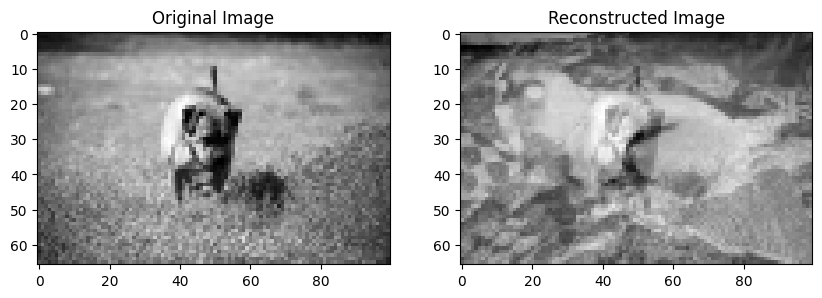

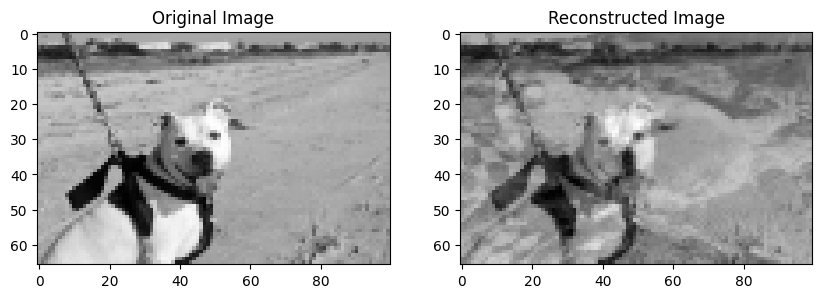

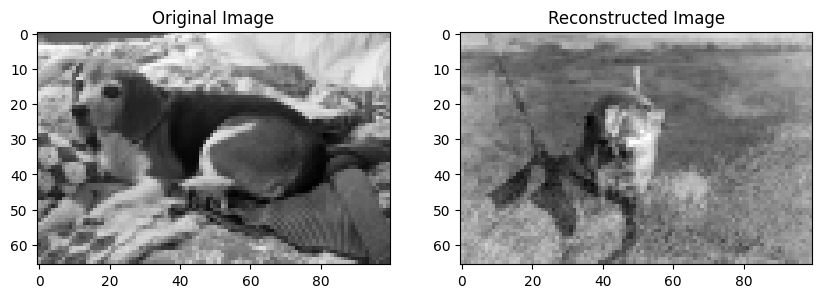

In [24]:
# Step 1: Reconstruct the images by projecting back into the original space
reconstructed_images = np.dot(projected_data, top_k_eigenvectors.T).real.astype(np.float32)

# Step 2: Reshape the reconstructed data to form the images
reconstructed_images = [reconstructed_image.reshape((height, width)) for reconstructed_image in reconstructed_images]

# Step 3: Print the shape of the reconstructed images to verify
print(f"Reconstructed images shape: {reconstructed_images[0].shape}")

# Display original and reconstructed images side by side for comparison
for i in range(len(reconstructed_images)):
    plt.figure(figsize=(10, 5))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(normalized_images[i], cmap='gray')
    plt.title('Original Image')
    
    # Reconstructed image
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title('Reconstructed Image')
    
    plt.show()

### Compare the reconstructed images with the original images to observe the effects of dimensionality reduction.

# Experimentation

### Vary the number of principal components (k) and observe the impact on the quality of the reconstructed images.

### Plot the variance explained by the principal components and determine the optimal number of components that balances compression and quality

# Visual Analysis

### Display the original images alongside the reconstructed images for different values of k.

### Comment on the visual quality of the images and how much information is lost during compression.

# Error Analysis

### Compute the Mean Squared Error (MSE) between the original and reconstructed images.

### Analyze the trade-off between compression and reconstruction error.